<a href="https://colab.research.google.com/github/ChakritKammason/DPDM/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [ ]:
X.shape

(300, 2)

In [ ]:
y.shape

(300,)

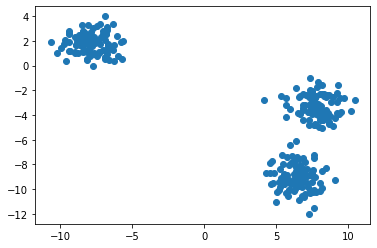

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

#import

In [ ]:
from sklearn.cluster import KMeans

#Define

In [ ]:
KMclust = KMeans(n_clusters=3)

#train

In [ ]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Predict

In [ ]:
label = KMclust.predict(X)

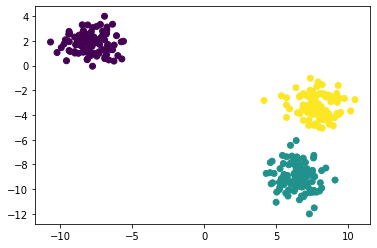

In [ ]:
plt.scatter(X[:,0],X[:,1], c=label)

#Color quantization (application of kmean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/My Drive/DWDM_Material'
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['teach.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'Copy of search_click.csv',
 'Copy of w_restaurant.csv',
 'metadata.xlsx',
 'Preprocessing02.html',
 'reduced_marketbasket.csv',
 'search_click.csv',
 'teach02.csv',
 'test.csv',
 'w_restaurant.csv',
 '666d790734bee7737c0b5144c462b9b5.jpg']

In [ ]:
import cv2
import os

In [ ]:
img = cv2.imread(os.path.join(path,'666d790734bee7737c0b5144c462b9b5.jpg'))

In [ ]:
img.shape

(446, 320, 3)

In [ ]:
img

array([[[22, 27, 30],
        [10, 15, 18],
        [10, 15, 18],
        ...,
        [ 0,  0,  6],
        [ 4,  3, 12],
        [25, 24, 33]],

       [[15, 20, 23],
        [ 5, 10, 13],
        [ 6, 11, 14],
        ...,
        [ 6,  5, 14],
        [ 9,  8, 17],
        [ 4,  3, 12]],

       [[11, 16, 19],
        [ 2,  7, 10],
        [ 1,  6,  9],
        ...,
        [13, 12, 21],
        [16, 15, 24],
        [ 7,  6, 15]],

       ...,

       [[14, 10,  9],
        [12,  8,  7],
        [17, 13, 12],
        ...,
        [16, 11, 10],
        [ 9,  4,  3],
        [ 8,  3,  2]],

       [[14, 10,  9],
        [13,  9,  8],
        [18, 14, 13],
        ...,
        [15, 10,  9],
        [ 7,  2,  1],
        [ 7,  2,  1]],

       [[14, 10,  9],
        [13,  9,  8],
        [18, 14, 13],
        ...,
        [15, 10,  9],
        [ 7,  2,  1],
        [ 6,  1,  0]]], dtype=uint8)

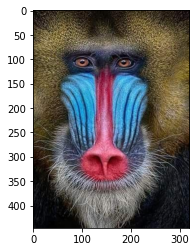

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(RGB_img)

# count unique colors

In [ ]:
import numpy as np

In [ ]:
np.unique(RGB_img).shape

(256,)

# Use K-mean to reduce colors from 256 colors to 8 colors

In [ ]:
#define
myQuqntize = KMeans(n_clusters=4)

In [ ]:
img_row = np.reshape(RGB_img,(446*320,3))
img_row

array([[30, 27, 22],
       [18, 15, 10],
       [18, 15, 10],
       ...,
       [ 9, 10, 15],
       [ 1,  2,  7],
       [ 0,  1,  6]], dtype=uint8)

In [ ]:
#train
myQuqntize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Predict
res = myQuqntize.predict(img_row)

In [ ]:
res

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

# Get Cluster centers

In [ ]:
Clus_cen = myQuqntize.cluster_centers_
Clus_cen

array([[ 96.97895664,  80.80148772,  68.66316923],
       [ 70.79899303, 151.67598761, 199.50201394],
       [158.87023185, 130.75701472, 129.69988154],
       [ 31.24084994,  27.58733225,  24.4852989 ]])

In [ ]:
Clus_cen.shape

(4, 3)

# Map colors back to the image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuqntize.predict([RGB_img[i,j,:]]),:]

In [ ]:
new_img_ = new_img/255

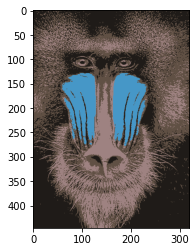

In [ ]:
plt.imshow(new_img_)